# FUTURE SALES PREDICTION-ML

## Objective:
    
- The objective of this project is to develope a predictive model to estimate the future sales of video games based on sales data and various features such as title,platform,genre,publisher,critic score,user score,total shipped units,production cost and release year. Using those datas available we can predict the global sales of video games.

## Dataset Description

The dataset used for this project consists of the following columns:

- **Title**            : The title or name of the video game.

- **Platform**         : The gaming platform or console on which the game is released(eg., PC, PS, PS2, etc..).

- **Genre**            : The genre or category of the video game(eg., adventure, sports, racing, etc..)

- **Publisher**        : The company that publishes the video game.

- **VG Score**         : The video game score or rating provided by video game magazines or websites.

- **Critic Score**     : The rating given by game critics.

- **User Score**       : The rating given by users or gamers.

- **Total Shipped**    : The total number of units shipped.

- **Aisan Sales**      : The total sales revenue generated in Aisan countries

- **North American Sales** : The total sales revenue generated in North America

- **European Sales**     : The total sales revenue generated in European countries

- **Japan Sales**      : The total sales revenue generated in Japan

- **Global Sales**     : The total sales revenue generated globally.

- **Production Cost** : The cost incurred for developing and producing the video game.

- **Release Year**    : The year in which the video game was released.

## Steps

- Importing Libraries

- Read Data

- Data Preprocessing

- Feature Engineering

- Model Training

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import joblib as jb

from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.ensemble import GradientBoostingRegressor

from math import sqrt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

## Read the train data

- Reading the data into the pandas dataframe is the first step in machine learning. To read data from a file into a pandas DataFrame, we can use the 'pd.read_csv()' function if your data is in CSV format. If our data is in a different format, then there are corresponding functions available in pandas.

In [2]:
data=pd.read_csv('D:\data science/sales project/files/train/raw/train.csv')

In [3]:
data

,title,platform,genre,publisher,vg_score,critic_score,user_score,total_shipped,aisan_sales,north_american_sales,japan_sales,european_sales,global_sales,Production Cost,release_year
0,DS Dengeki Bunko Inukami feat. Animation,DS,Adventure,Sony Computer Entertainment,7.0,7.0,8.0,50.0,3.69,3.35,1.68,6.45,15.17,3.18,2006
1,Iggle Pop,PC,Puzzle,Activision,5.0,1.0,8.0,42.0,4.75,3.45,4.13,6.71,19.04,3.00,2004
2,Tayutama Its Happy Days,PC,Adventure,Frontier Developments,7.0,4.0,2.0,46.0,3.18,4.99,5.33,2.79,16.29,4.60,2009
3,Sensible Soccer 2006,PS2,Sports,Activision,2.0,1.0,2.0,141.0,4.68,3.28,2.98,5.71,16.65,4.95,2006
4,Hayarigami Keishichou Kaii Jiken File,PS2,Adventure,IBM,10.0,7.0,7.0,72.0,1.67,3.43,3.70,4.18,12.98,4.44,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6222,Forever Worlds,PC,Adventure,Electronic Arts,7.0,3.0,3.0,121.0,4.83,7.94,1.48,6.43,20.68,6.17,2004
6223,Initial D Extreme Stage,PS3,Racing,Frontier Developments,1.0,5.0,6.0,182.0,3.00,2.00,0.08,2.31,4.47,1.56,2008
6224,BigHead Bash,PC,Shooter,Frontier Developments,7.0,1.0,6.0,93.0,4.63,3.05,1.52,1.39,10.59,3.11,2012
6225,Kurushi Final Mental Blocks,PSN,Puzzle,Activision,6.0,3.0,9.0,208.0,4.21,5.49,3.08,5.06,17.84,3.93,2010


## Data Preprocessing

- Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model.

In [4]:
#To see the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6227 entries, 0 to 6226
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 6227 non-null   object 
 1   platform              6227 non-null   object 
 2   genre                 6227 non-null   object 
 3   publisher             6227 non-null   object 
 4   vg_score              6227 non-null   float64
 5   critic_score          6227 non-null   float64
 6   user_score            6227 non-null   float64
 7   total_shipped         6227 non-null   float64
 8   aisan_sales           6227 non-null   float64
 9   north_american_sales  6227 non-null   float64
 10  japan_sales           6227 non-null   float64
 11  european_sales        6227 non-null   float64
 12  global_sales          6227 non-null   float64
 13  Production Cost       6227 non-null   float64
 14  release_year          6227 non-null   int64  
dtypes: float64(10), int64

In [5]:
#To check if there is any null value in the dataset
data.isnull().sum()

title                   0
platform                0
genre                   0
publisher               0
vg_score                0
critic_score            0
user_score              0
total_shipped           0
aisan_sales             0
north_american_sales    0
japan_sales             0
european_sales          0
global_sales            0
Production Cost         0
release_year            0
dtype: int64

In [6]:
#To check if there is any nan value in the dataset
data.isna().sum()

title                   0
platform                0
genre                   0
publisher               0
vg_score                0
critic_score            0
user_score              0
total_shipped           0
aisan_sales             0
north_american_sales    0
japan_sales             0
european_sales          0
global_sales            0
Production Cost         0
release_year            0
dtype: int64

In [7]:
#To see the unique values in the dataset
data.nunique()

title                   5518
platform                  10
genre                      8
publisher                  8
vg_score                  39
critic_score              69
user_score                24
total_shipped            400
aisan_sales              702
north_american_sales     762
japan_sales              564
european_sales           692
global_sales            2105
Production Cost          633
release_year              21
dtype: int64

In [8]:
#To check the duplicate values in the dataset
data.duplicated().sum()

0

In [9]:
data.describe()

,vg_score,critic_score,user_score,total_shipped,aisan_sales,north_american_sales,japan_sales,european_sales,global_sales,Production Cost,release_year
count,6227.000000,6227.000000,6227.000000,6227.000000,6227.000000,6227.000000,6227.000000,6227.000000,6227.000000,6227.000000,6227.000000
mean,6.105123,5.709106,5.534254,143.744217,3.862492,2.591275,3.080732,3.052234,11.607325,3.571927,2007.465232
std,2.788897,2.801076,2.867762,89.364179,1.788431,2.040604,1.754591,2.245405,5.857546,1.775259,4.763525
min,1.000000,1.000000,1.000000,0.100000,1.000000,0.010000,0.010000,0.010000,0.090000,0.010000,2000.000000
25%,4.000000,3.000000,3.000000,66.000000,3.000000,0.610000,1.710000,1.030000,6.325000,2.155000,2004.000000
50%,6.000000,6.000000,6.000000,142.000000,3.000000,2.420000,3.130000,3.060000,12.240000,3.440000,2007.000000
75%,8.000000,8.000000,8.000000,221.000000,5.105000,4.060000,4.600000,5.030000,16.240000,4.965000,2010.000000
max,10.000000,10.000000,10.000000,300.000000,13.800000,8.000000,6.000000,7.000000,27.080000,8.000000,2020.000000


## Outliers Finding

- Outliers are those data points that are significantly different from the rest of the dataset that are caused due to experimental error or human error.
- We can find outliers using various methods here we use box plot method to find if there is any outliers in the dataset

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

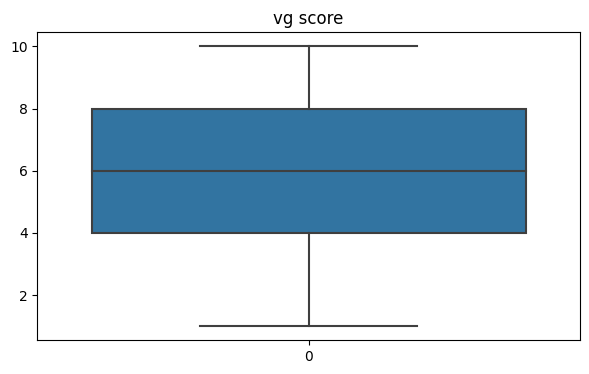

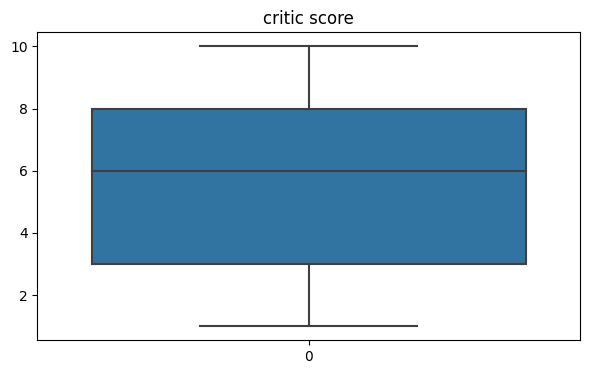

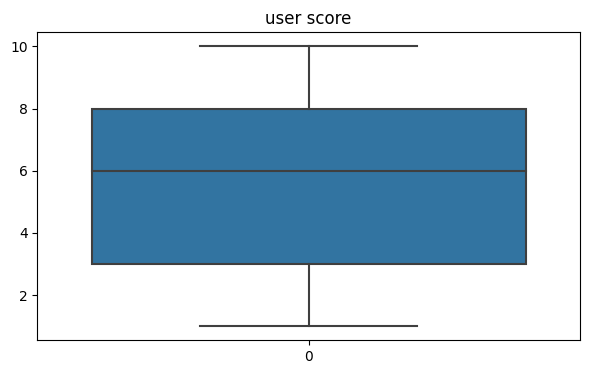

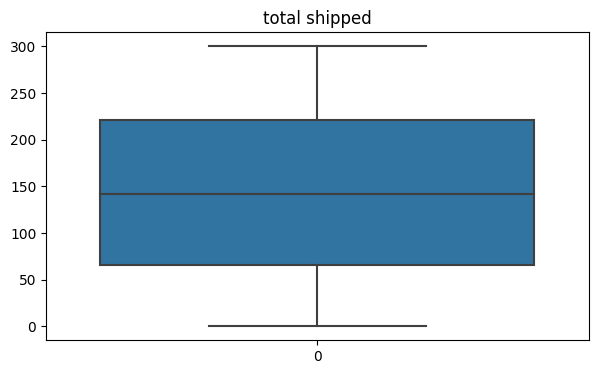

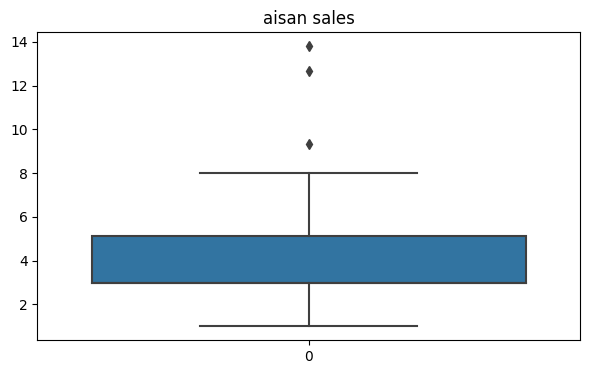

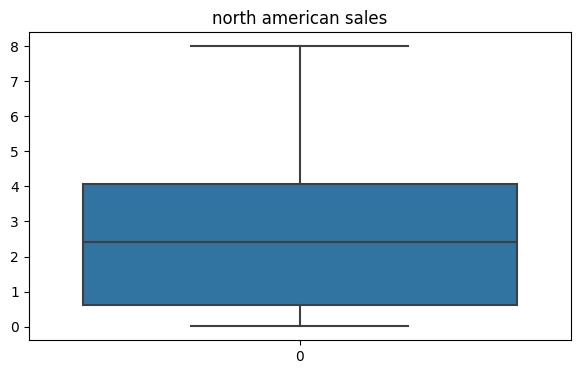

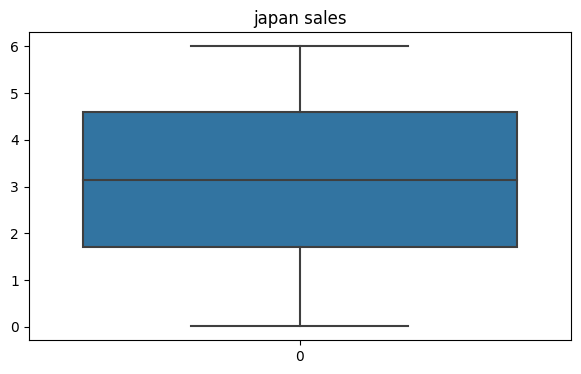

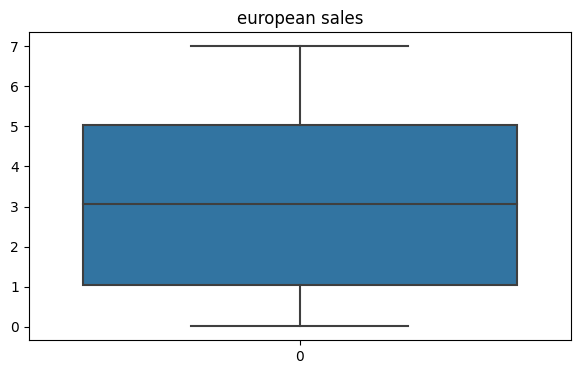

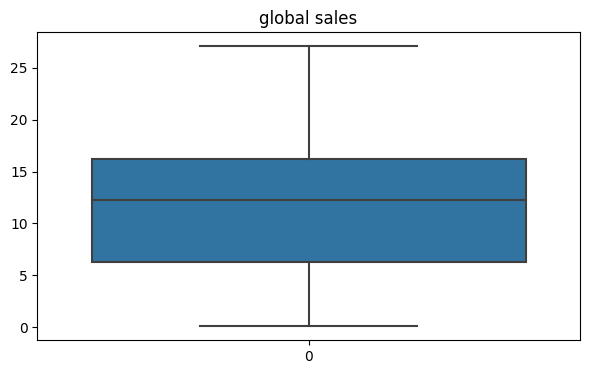

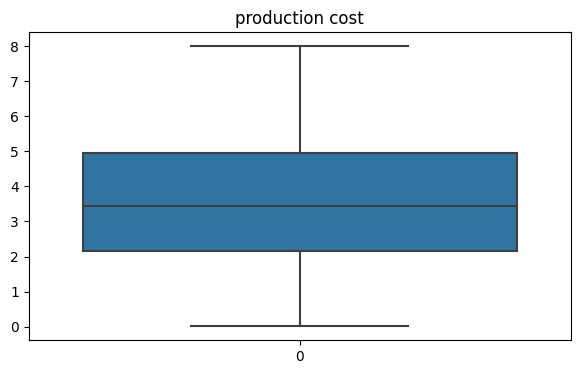

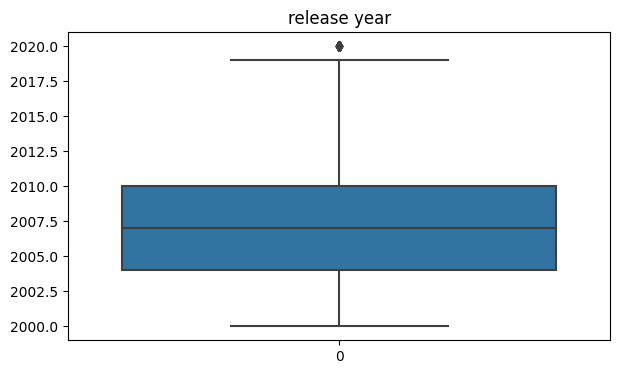

In [11]:
#Using boxplot to find outliers
plt.figure(figsize=(7,4))
sns.boxplot(data['vg_score'])
plt.title('vg score')

plt.figure(figsize=(7,4))
sns.boxplot(data['critic_score'])
plt.title('critic score')

plt.figure(figsize=(7,4))
sns.boxplot(data['user_score'])
plt.title('user score')

plt.figure(figsize=(7,4))
sns.boxplot(data['total_shipped'])
plt.title('total shipped')

plt.figure(figsize=(7,4))
sns.boxplot(data['aisan_sales'])
plt.title('aisan sales')

plt.figure(figsize=(7,4))
sns.boxplot(data['north_american_sales'])
plt.title('north american sales')

plt.figure(figsize=(7,4))
sns.boxplot(data['japan_sales'])
plt.title('japan sales')

plt.figure(figsize=(7,4))
sns.boxplot(data['european_sales'])
plt.title('european sales')

plt.figure(figsize=(7,4))
sns.boxplot(data['global_sales'])
plt.title('global sales')

plt.figure(figsize=(7,4))
sns.boxplot(data['Production Cost'])
plt.title('production cost')

plt.figure(figsize=(7,4))
sns.boxplot(data['release_year'])
plt.title('release year')

plt.show()

- While using box plot we found that there is outliers in aisan_sales and release_year. So it is necessary to handle those outliers for the model to perform well
- To handle there are some techniques we use capping method to handle those outliers

## Handling Outliers
- We can handle ouliers using capping method

In [12]:
#handling outlier in aisan_sales
q1=data['aisan_sales'].quantile(0.25)
q1

3.0

In [13]:
q3=data['aisan_sales'].quantile(0.75)
q3

5.105

In [14]:
IQR=q3-q1
IQR

2.1050000000000004

In [15]:
lower_range=q1-(1.5*IQR)
lower_range

-0.15750000000000064

In [16]:
upper_range=q3+(1.5*IQR)
upper_range

8.262500000000001

In [17]:
#capping
data['aisan_sales']=np.where(data['aisan_sales']<lower_range,lower_range,
                    np.where(data['aisan_sales']>upper_range,upper_range,
                    data['aisan_sales']))

<Axes: >

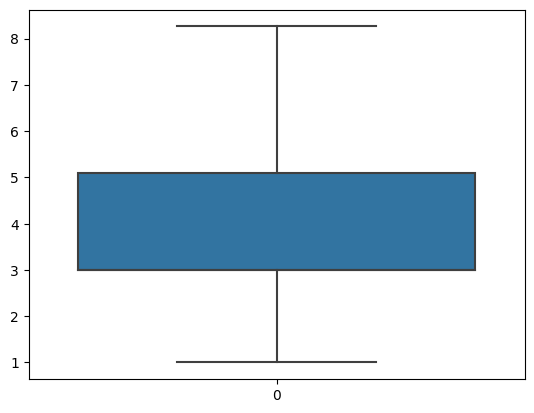

In [18]:
sns.boxplot(data['aisan_sales'])

In [19]:
#handling outlier in release_year
q1=data['release_year'].quantile(0.25)
q1

2004.0

In [20]:
q3=data['release_year'].quantile(0.75)
q3

2010.0

In [21]:
IQR=q3-q1
IQR

6.0

In [22]:
lower_range=q1-(1.5*IQR)
lower_range

1995.0

In [23]:
upper_range=q3+(1.5*IQR)
upper_range

2019.0

In [24]:
#capping
data['release_year']=np.where(data['release_year']<lower_range,lower_range,
                     np.where(data['release_year']>upper_range,upper_range,
                     data['release_year']))

<Axes: >

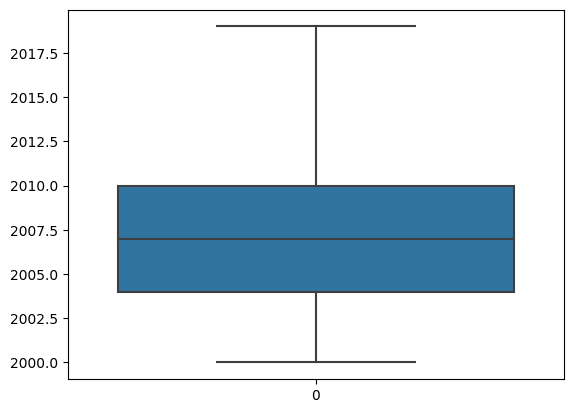

In [25]:
sns.boxplot(data['release_year'])

- By performing the above steps we handled the outliers in our dataset

## Feature Engineering

- Feature Engineering is the process of extracting and organizing the important features from raw data in such a way that it fits the purpose of the machine learning model.

## Features and Labels

In [26]:
df=data.copy()
y=df['global_sales'].copy()
x=df.drop(['global_sales'],axis=1)

- The above method seperates the features and labels from the data. The label variables are copied into y amd the remaining features are copied into x. 

## Splitting train and test datas

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=123)

- This splits the data into test and train using train_test_split function. The x and y variables are seperated into x_train,x_test,y_train and y_test at a train_size of 0.7(ie, 70% of the data). The shuffle=True function randomly shuffles the data with a random state of 123

In [29]:
#Saving the files to csv format
x_train.to_csv('D:\data science/sales project/files/train/raw/x_train.csv',index=False)
y_train.to_csv('D:\data science/sales project/files/train/raw/y_train.csv',index=False)

x_test.to_csv('D:\data science/sales project/files/evaluate/raw/x_test.csv',index=False)
y_test.to_csv('D:\data science/sales project/files/evaluate/raw/y_test.csv',index=False)

## Feature Encoding

- Feature encoding is the process of transforming the categorical datas into numerical data. By transforming the data our machine learning model can understand the data.

In [30]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
encoder=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
x_encode=encoder.fit(x_train)
#Saving the file as pkl
import joblib as jb
jb.dump(x_encode,'D:\data science/sales project/files/train/model/train_encode_model.pkl')
x_encode=encoder.transform(x_train)
x_train_encode=pd.DataFrame(x_encode,columns=x_train.columns)

- The ordinal encoder will transform categorical variables to numerical variables. To handle any unknown categorical data during testing and training we use the function handle_unknown='use_encoded-value'. The unknown_value=-1 function replaces the values of unknown categories as -1

In [32]:
x_train_encode

,title,platform,genre,publisher,vg_score,critic_score,user_score,total_shipped,aisan_sales,north_american_sales,japan_sales,european_sales,Production Cost,release_year
0,357.0,5.0,0.0,7.0,35.0,38.0,10.0,101.0,426.0,372.0,330.0,90.0,135.0,11.0
1,853.0,2.0,4.0,3.0,23.0,48.0,5.0,307.0,198.0,358.0,207.0,0.0,1.0,17.0
2,2803.0,4.0,4.0,5.0,0.0,18.0,10.0,327.0,205.0,207.0,476.0,96.0,252.0,4.0
3,349.0,2.0,3.0,1.0,35.0,18.0,2.0,186.0,198.0,427.0,375.0,1.0,211.0,6.0
4,2221.0,2.0,7.0,3.0,35.0,38.0,2.0,143.0,209.0,173.0,386.0,612.0,473.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4353,1354.0,2.0,0.0,5.0,9.0,11.0,15.0,335.0,317.0,612.0,437.0,464.0,449.0,3.0
4354,3204.0,8.0,3.0,1.0,14.0,3.0,21.0,346.0,179.0,173.0,70.0,191.0,48.0,7.0
4355,1494.0,0.0,4.0,2.0,7.0,65.0,0.0,211.0,198.0,1.0,346.0,563.0,541.0,9.0
4356,551.0,0.0,6.0,2.0,9.0,11.0,1.0,173.0,198.0,11.0,183.0,4.0,485.0,11.0


In [33]:
x_train_encode.to_csv('D:\data science/sales project/files/train/processed/encoded_processed.csv',index=False)

<Axes: >

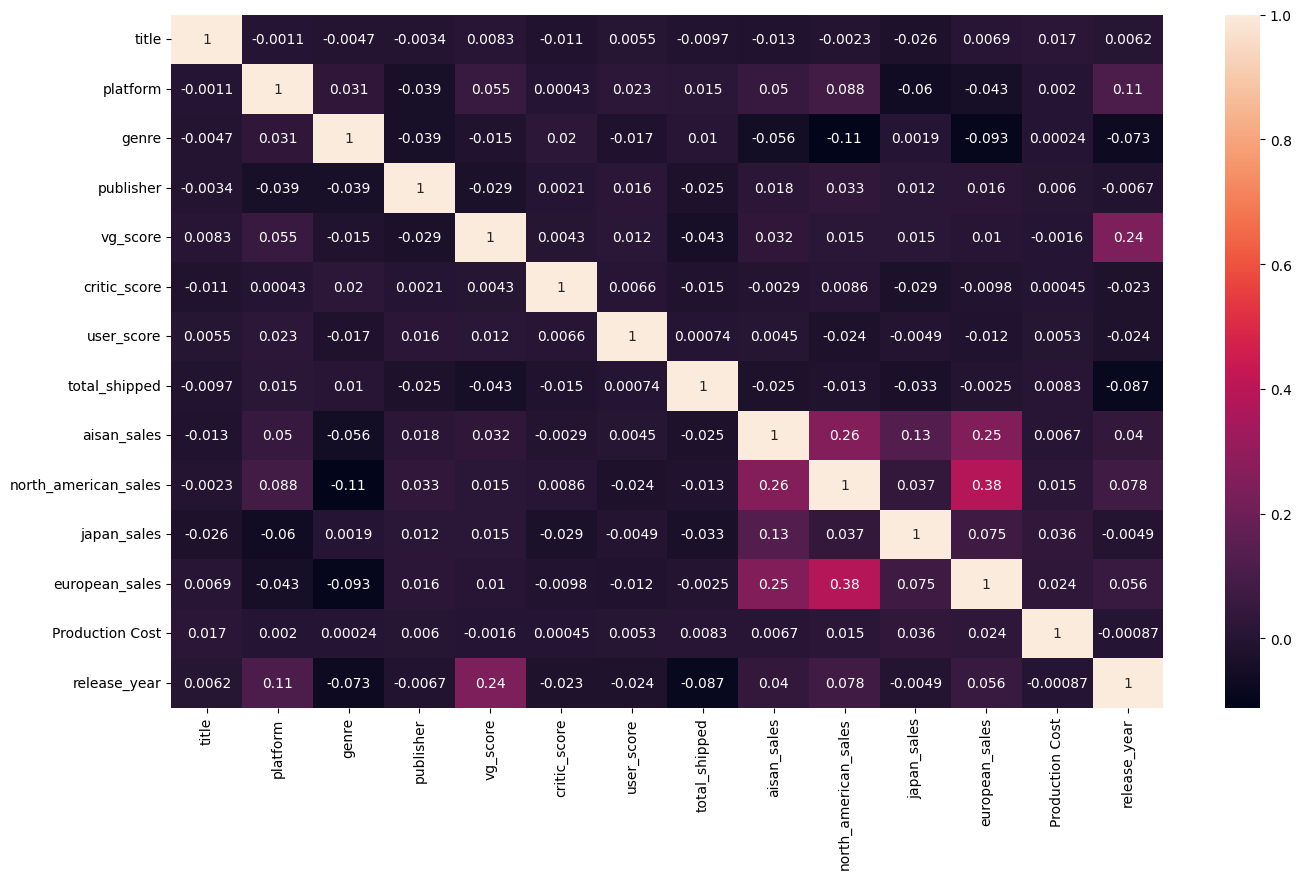

In [34]:
plt.figure(figsize=(16,9))
sns.heatmap(x_train_encode.corr(),annot=True)

## Feature Selection
- Feature selection in machine learning is the process of finding the best set of features that allows one to build optimized model.

In [35]:
from sklearn.feature_selection import SelectKBest,f_regression

In [36]:
bestfeatures=SelectKBest(score_func=f_regression, k=10)
fit=bestfeatures.fit(x_train_encode,y_train)

- SelectKBest is the class used for feature selection, and f_regression is the scoring function that will be used to evaluate the features.

In [37]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Specs        Score
11        european_sales  4413.794714
9   north_american_sales  4159.390062
8            aisan_sales  2594.492913
10           japan_sales   972.663861
2                  genre    51.944149
13          release_year    18.737422
1               platform     9.139698
4               vg_score     5.321093
7          total_shipped     4.717520
12       Production Cost     3.555734


- These are good feature and score of our data

In [38]:
feature=featureScores.nlargest(10,'Score')
feature

,Specs,Score
11,european_sales,4413.794714
9,north_american_sales,4159.390062
8,aisan_sales,2594.492913
10,japan_sales,972.663861
2,genre,51.944149
13,release_year,18.737422
1,platform,9.139698
4,vg_score,5.321093
7,total_shipped,4.717520
12,Production Cost,3.555734


In [39]:
feature_list=feature['Specs'].to_list()
feature_list

['european_sales',
 'north_american_sales',
 'aisan_sales',
 'japan_sales',
 'genre',
 'release_year',
 'platform',
 'vg_score',
 'total_shipped',
 'Production Cost']

In [40]:
jb.dump(feature_list,'D:\data science/sales project/files/train/model/feature_selected_model.pkl')

['D:\\data science/sales project/files/train/model/feature_selected_model.pkl']

In [41]:
feature_selected=x_train_encode[feature_list]
feature_selected

,european_sales,north_american_sales,aisan_sales,japan_sales,genre,release_year,platform,vg_score,total_shipped,Production Cost
0,90.0,372.0,426.0,330.0,0.0,11.0,5.0,35.0,101.0,135.0
1,0.0,358.0,198.0,207.0,4.0,17.0,2.0,23.0,307.0,1.0
2,96.0,207.0,205.0,476.0,4.0,4.0,4.0,0.0,327.0,252.0
3,1.0,427.0,198.0,375.0,3.0,6.0,2.0,35.0,186.0,211.0
4,612.0,173.0,209.0,386.0,7.0,13.0,2.0,35.0,143.0,473.0
...,...,...,...,...,...,...,...,...,...,...
4353,464.0,612.0,317.0,437.0,0.0,3.0,2.0,9.0,335.0,449.0
4354,191.0,173.0,179.0,70.0,3.0,7.0,8.0,14.0,346.0,48.0
4355,563.0,1.0,198.0,346.0,4.0,9.0,0.0,7.0,211.0,541.0
4356,4.0,11.0,198.0,183.0,6.0,11.0,0.0,9.0,173.0,485.0


In [42]:
feature_selected.to_csv('D:\data science/sales project/files/train/processed/feature_selected_x_train.csv',index=False)

## Model Training

-  Model training is a process in which a machine learning algorithm is fed with training data from which it can learn.

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

- As our data is continuous we are using regressor model ie, GradientBoosting Regressor

In [44]:
gb=GradientBoostingRegressor()
gb.fit(feature_selected,y_train)
print('Train score:',gb.score(feature_selected,y_train)* 100)

Train score: 99.61704376301525


In [45]:
jb.dump(gb,'D:\data science/sales project/files/train/model/gb.pkl')

['D:\\data science/sales project/files/train/model/gb.pkl']

## PREDICTION

## Load x_test and y_test

In [46]:
feature_selection=jb.load('D:\data science/sales project/files/train/model/feature_selected_model.pkl')
encode_model=jb.load('D:\data science/sales project/files/train/model/train_encode_model.pkl')
model=jb.load('D:\data science/sales project/files/train/model/gb.pkl')

In [47]:
encode_model

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [48]:
feature_selection

['european_sales',
 'north_american_sales',
 'aisan_sales',
 'japan_sales',
 'genre',
 'release_year',
 'platform',
 'vg_score',
 'total_shipped',
 'Production Cost']

In [49]:
model

GradientBoostingRegressor()

In [50]:
encode_data=encode_model.transform(x_test)
encode_data=pd.DataFrame(encode_data,columns=x_test.columns)
encode_data

,title,platform,genre,publisher,vg_score,critic_score,user_score,total_shipped,aisan_sales,north_american_sales,japan_sales,european_sales,Production Cost,release_year
0,-1.0,0.0,6.0,7.0,0.0,18.0,6.0,346.0,198.0,26.0,461.0,584.0,398.0,9.0
1,-1.0,4.0,7.0,3.0,35.0,48.0,15.0,348.0,219.0,406.0,496.0,675.0,326.0,2.0
2,598.0,2.0,7.0,0.0,14.0,11.0,2.0,263.0,660.0,180.0,98.0,516.0,132.0,0.0
3,-1.0,8.0,5.0,3.0,23.0,6.0,10.0,100.0,632.0,329.0,138.0,446.0,238.0,11.0
4,-1.0,2.0,7.0,2.0,9.0,58.0,8.0,174.0,210.0,122.0,513.0,177.0,304.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,-1.0,0.0,3.0,0.0,23.0,41.0,10.0,122.0,118.0,98.0,401.0,-1.0,333.0,7.0
1865,-1.0,4.0,5.0,2.0,35.0,6.0,4.0,336.0,234.0,467.0,329.0,211.0,111.0,3.0
1866,-1.0,2.0,6.0,7.0,23.0,0.0,4.0,316.0,467.0,490.0,83.0,379.0,539.0,6.0
1867,-1.0,2.0,6.0,2.0,23.0,48.0,15.0,130.0,653.0,135.0,142.0,244.0,367.0,9.0


In [51]:
feature_selected=encode_data[feature_selection]
feature_selected

,european_sales,north_american_sales,aisan_sales,japan_sales,genre,release_year,platform,vg_score,total_shipped,Production Cost
0,584.0,26.0,198.0,461.0,6.0,9.0,0.0,0.0,346.0,398.0
1,675.0,406.0,219.0,496.0,7.0,2.0,4.0,35.0,348.0,326.0
2,516.0,180.0,660.0,98.0,7.0,0.0,2.0,14.0,263.0,132.0
3,446.0,329.0,632.0,138.0,5.0,11.0,8.0,23.0,100.0,238.0
4,177.0,122.0,210.0,513.0,7.0,17.0,2.0,9.0,174.0,304.0
...,...,...,...,...,...,...,...,...,...,...
1864,-1.0,98.0,118.0,401.0,3.0,7.0,0.0,23.0,122.0,333.0
1865,211.0,467.0,234.0,329.0,5.0,3.0,4.0,35.0,336.0,111.0
1866,379.0,490.0,467.0,83.0,6.0,6.0,2.0,23.0,316.0,539.0
1867,244.0,135.0,653.0,142.0,6.0,9.0,2.0,23.0,130.0,367.0


In [52]:
y_pred=pd.DataFrame(model.predict(feature_selected))
y_pred

,0
0,11.153053
1,19.581775
2,16.710215
3,17.624186
4,12.619736
...,...
1864,6.466883
1865,14.898446
1866,15.932454
1867,13.984486


## Evaluation of Model

In [53]:
from math import sqrt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

- The above function generates mean_absolute_error,mean_squared_error and r2_score. The lower the MAE, MSE, and RMSE values, the better the model's performance in minimizing the prediction errors. The R2_score must be close to 1 for the model to perform well 

In [54]:
print('MAE:',mean_absolute_error(y_pred,y_test))

MAE: 0.4961370281829161


In [55]:
print('MSE:',mean_squared_error(y_pred,y_test))

MSE: 1.2002453725709892


In [56]:
print('RMSE:',sqrt(mean_squared_error(y_pred,y_test)))

RMSE: 1.0955571060291605


In [57]:
print('R2:',r2_score(y_pred,y_test))

R2: 0.9626405021809663


- As we see our scores are good and r2_score close to 1 shows that our model has performed well in training